# Stage 2 mesh images from Different Angles

In [4]:
import os
from collections import defaultdict

# Directories containing images for each column
source_dirs = {
    "DreamGaussian": "dreamgaussian/",
    "Ours": "ours/",
}

# Function to group images by angles
def group_images_by_angle(source_dirs):
    grouped_images = {
        "0h": defaultdict(list),
        "45h": defaultdict(list),
        "180h": defaultdict(list),
    }

    for dir_name, dir_path in source_dirs.items():
        for image_file in sorted(os.listdir(dir_path)):
            angle = None
            if "_0." in image_file:
                angle = "0h"
            elif "_45." in image_file:
                angle = "45h"
            elif "_180." in image_file:
                angle = "180h"

            if angle:
                grouped_images[angle][dir_name].append(os.path.join(dir_path, image_file))

    return grouped_images

# Group the images
grouped_images = group_images_by_angle(source_dirs)

# Print the grouped images for verification
for angle, images in grouped_images.items():
    print(f"\nAngle: {angle}")
    for method, image_list in images.items():
        print(f"  {method}:")
        for image in image_list:
            print(f"    {image}")
            
            
            import matplotlib.pyplot as plt
from PIL import Image
import os

# Assuming reference_images_dir contains the path to the reference images directory
reference_images_dir = "/Users/julius/repos/sisa3d/master-thesis-ds/images/compare"

# Create a figure with subplots for each angle and one extra column for reference images
fig, axes = plt.subplots(nrows=len(grouped_images["0h"]["DreamGaussian"]), ncols=1 + 3*len(source_dirs), figsize=(20, 10))

# Iterate over the angles and plot images
for angle_idx, (angle, methods) in enumerate(grouped_images.items()):
    for row_idx, method in enumerate(source_dirs.keys()):
        for image_idx, image_path in enumerate(methods[method]):
            image = Image.open(image_path)
            ax = axes[image_idx, 1 + angle_idx * len(source_dirs) + row_idx]  # Shift by one for the reference column
            ax.imshow(image)
            ax.axis('off')

# Plot reference images
reference_image_paths = sorted([os.path.join(reference_images_dir, fname) for fname in os.listdir(reference_images_dir)])
for image_idx, ref_image_path in enumerate(reference_image_paths):
    ref_image = Image.open(ref_image_path)
    ax = axes[image_idx, 0]  # First column for reference images
    ax.imshow(ref_image)
    ax.axis('off')

# Set the column titles
fig.text(0.5 / (len(grouped_images) * len(source_dirs) + 1), -0.01, "Reference", ha='center', fontsize=14, weight='bold', va='top')
for angle_idx, angle in enumerate(grouped_images.keys()):
    for col_idx, method in enumerate(source_dirs.keys()):
        fig.text((1 + angle_idx * len(source_dirs) + col_idx + 0.5) / (1 + len(grouped_images) * len(source_dirs)), -0.01, f"{method} ({angle[:-1]}°)", ha='center', fontsize=14, weight='bold', va='top')

# Adjust layout
plt.tight_layout(pad=2)
# Save and show the plot
plt.savefig('comparison_image_with_reference.png', dpi=300, bbox_inches='tight')
plt.show()


Angle: 0h
  DreamGaussian:
    dreamgaussian/bird/0_0.png
  Ours:
    ours/bird/0_0.png

Angle: 45h
  DreamGaussian:
    dreamgaussian/bird/0_45.png
  Ours:
    ours/bird/0_45.png

Angle: 180h
  DreamGaussian:
    dreamgaussian/bird/0_180.png
  Ours:
    ours/bird/0_180.png


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

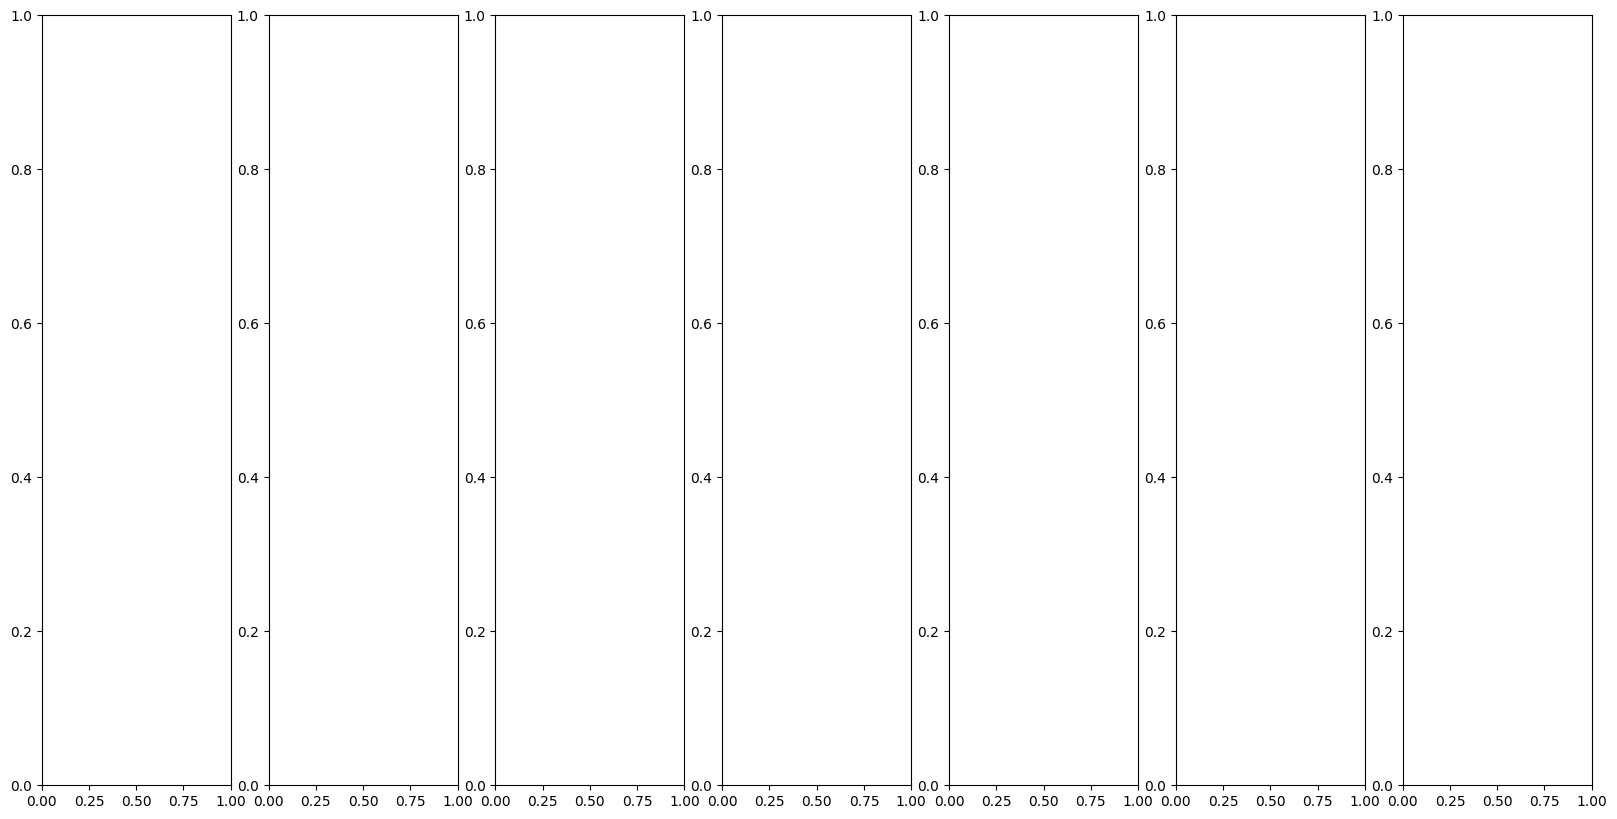

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Assuming reference_images_dir contains the path to the reference images directory
reference_images_dir = "/Users/julius/repos/sisa3d/master-thesis-ds/images/compare"

# Create a figure with subplots for each angle and one extra column for reference images
fig, axes = plt.subplots(nrows=len(grouped_images["0h"]["DreamGaussian"]), ncols=1 + 3*len(source_dirs), figsize=(20, 10))

# Iterate over the angles and plot images
for angle_idx, (angle, methods) in enumerate(grouped_images.items()):
    for row_idx, method in enumerate(source_dirs.keys()):
        for image_idx, image_path in enumerate(methods[method]):
            image = Image.open(image_path)
            ax = axes[image_idx, 1 + angle_idx * len(source_dirs) + row_idx]  # Shift by one for the reference column
            ax.imshow(image)
            ax.axis('off')

# Plot reference images
reference_image_paths = sorted([os.path.join(reference_images_dir, fname) for fname in os.listdir(reference_images_dir)])
for image_idx, ref_image_path in enumerate(reference_image_paths):
    ref_image = Image.open(ref_image_path)
    ax = axes[image_idx, 0]  # First column for reference images
    ax.imshow(ref_image)
    ax.axis('off')

# Set the column titles
fig.text(0.5 / (len(grouped_images) * len(source_dirs) + 1), -0.01, "Reference", ha='center', fontsize=14, weight='bold', va='top')
for angle_idx, angle in enumerate(grouped_images.keys()):
    for col_idx, method in enumerate(source_dirs.keys()):
        fig.text((1 + angle_idx * len(source_dirs) + col_idx + 0.5) / (1 + len(grouped_images) * len(source_dirs)), -0.01, f"{method} ({angle[:-1]}°)", ha='center', fontsize=14, weight='bold', va='top')

# Adjust layout
plt.tight_layout(pad=2)
# Save and show the plot
plt.savefig('comparison_image_with_reference.png', dpi=300, bbox_inches='tight')
plt.show()